# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [247]:
# General tools
import pandas as pd
import numpy as np

# Functions
from functions import *

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from pprint import pprint

# Classification
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Classification (Initial)

In [248]:
# Load dataframe 
df = pd.read_pickle('df.pkl')

# Partition explanatory and response variables
X = df.drop(columns='Target')
print(X.shape)

y = df['Target']
print(y.shape)

(9557, 135)
(9557,)


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [250]:
clf_linear = LinearRegression()

In [251]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [252]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.49476987447698745

In [253]:
f1_linear = f1_score(y_test, y_pred, average='macro')
f1_linear

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28386560965239604

## Multiclass Logistic

In [254]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [255]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: C

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [256]:
clf_multiclass_logistic.score(X_test, y_test)

0.5230125523012552

In [257]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic

0.3871799012694391

## SVM

In [258]:
clf_SVM = SVC()

In [259]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [260]:
clf_SVM.score(X_test, y_test)

0.6260460251046025

In [261]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM

0.22173155053186192

## Random Forest

In [262]:
clf_RF = RandomForestClassifier()

In [263]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [264]:
clf_RF.score(X_test, y_test)

0.8948744769874477

In [265]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_RF

0.8397878195133621

In [266]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQBmeaned,0.067164
meaneduc,0.048493
SQBdependency,0.035989
SQBedjefe,0.026826
hogar_nin,0.024928
rooms,0.024703
qmobilephone,0.024661
overcrowding,0.022332
SQBhogar_nin,0.022176
SQBovercrowding,0.021311


## XGB Classifier

In [267]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [268]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.251929	validation_1-merror:0.268828
[1]	validation_0-merror:0.238195	validation_1-merror:0.258891
[2]	validation_0-merror:0.233224	validation_1-merror:0.256276
[3]	validation_0-merror:0.228515	validation_1-merror:0.245816
[4]	validation_0-merror:0.228646	validation_1-merror:0.251046
[5]	validation_0-merror:0.223283	validation_1-merror:0.250523
[6]	validation_0-merror:0.218967	validation_1-merror:0.250523
[7]	validation_0-merror:0.219097	validation_1-merror:0.246862
[8]	validation_0-merror:0.213996	validation_1-merror:0.243724
[9]	validation_0-merror:0.212819	validation_1-merror:0.239017
[10]	validation_0-merror:0.212034	validation_1-merror:0.241632
[11]	validation_0-merror:0.210464	validation_1-merror:0.238494
[12]	validation_0-merror:0.206148	validation_1-merror:0.232741
[13]	validation_0-merror:0.205363	validation_1-merror:0.230649
[14]	validation_0-merror:0.203401	validation_1-merror:0.228033
[15]	validation_0-merror:0.201177	validation_1-merror:0.224372
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [269]:
clf_xgb.score(X_test, y_test)

0.8603556485355649

In [270]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb

0.7887912428409045

### Feature Importance (XGBoost)

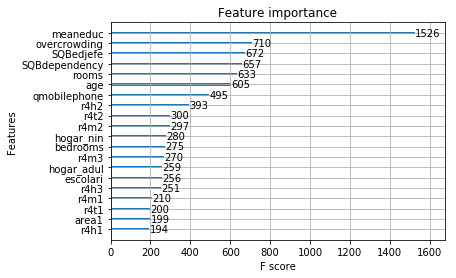

In [271]:
xgb.plot_importance(clf_xgb, max_num_features=20)

# Classification with Predicted Rent Values

In [272]:
# Load dataframe 
df_rent = pd.read_pickle('df_rent.pkl')

# Partition explanatory and response variables
X = df_rent.drop(columns='Target')
print(X.shape)

y = df_rent['Target']
print(y.shape)

(9557, 136)
(9557,)


In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [274]:
clf_linear = LinearRegression()

In [275]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [276]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.4916317991631799

In [277]:
f1_linear_rent = f1_score(y_test, y_pred, average='macro')
f1_linear_rent

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28363914080640606

## Multiclass Logistic

In [278]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [279]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [280]:
clf_multiclass_logistic.score(X_test, y_test)

0.4989539748953975

In [281]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_rent = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_rent

0.3294087387074886

## SVM

In [282]:
clf_SVM = SVC()

In [283]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [284]:
clf_SVM.score(X_test, y_test)

0.6323221757322176

In [285]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_rent = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_rent

0.2099798668643043

## Random Forests

In [286]:
clf_RF = RandomForestClassifier()

In [287]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [288]:
clf_RF.score(X_test, y_test)

0.9037656903765691

In [289]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_rent = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_rent

0.8491196917363437

In [290]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
v2a1,0.080843
SQBmeaned,0.042663
meaneduc,0.038621
SQBhogar_nin,0.030007
SQBdependency,0.028860
overcrowding,0.024594
SQBedjefe,0.023735
qmobilephone,0.023430
age,0.021883
SQBovercrowding,0.021024


## XGB Classifier

In [291]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [292]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.259516	validation_1-merror:0.289749
[1]	validation_0-merror:0.237802	validation_1-merror:0.265167
[2]	validation_0-merror:0.236625	validation_1-merror:0.251569
[3]	validation_0-merror:0.221583	validation_1-merror:0.23954
[4]	validation_0-merror:0.217659	validation_1-merror:0.235879
[5]	validation_0-merror:0.217005	validation_1-merror:0.237971
[6]	validation_0-merror:0.214127	validation_1-merror:0.240586
[7]	validation_0-merror:0.210595	validation_1-merror:0.235879
[8]	validation_0-merror:0.207587	validation_1-merror:0.235879
[9]	validation_0-merror:0.2017	validation_1-merror:0.235356
[10]	validation_0-merror:0.202485	validation_1-merror:0.232741
[11]	validation_0-merror:0.203139	validation_1-merror:0.232741
[12]	validation_0-merror:0.200392	validation_1-merror:0.232218
[13]	validation_0-merror:0.199869	validation_1-merror:0.231172
[14]	validation_0-merror:0.197122	validation_1-merror:0.229079
[15]	validation_0-merror:0.194768	validation_1-merror:0.225941
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [293]:
clf_xgb.score(X_test, y_test)

0.8697698744769874

In [294]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_rent = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_rent

0.8003930331587177

### Feature Importance (XGBoost)

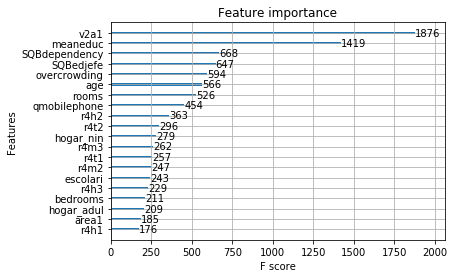

In [295]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (No Rent vs Rent)

In [296]:
print("Change in f1 with predicted rent values:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_rent - f1_linear, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_rent - f1_logistic, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_rent - f1_SVM, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_rent - f1_RF, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_rent - f1_xgb, 5))

Change in f1 with predicted rent values:

Linear Regression:	  -0.00023
Logistic Regression:	 -0.05777
Support Vector Machines: -0.01175
Random Forrest:		  0.00933
XGBoost:		 0.0116


### Random Forest vs XGBoost

In [297]:
print("NO RENT (RF)", f1_RF)
print("W/ RENT (RF)", f1_RF_rent)
print("NO RENT (XGB)", f1_xgb)
print("W/ RENT (XGB)", f1_xgb_rent)

NO RENT (RF) 0.8397878195133621
W/ RENT (RF) 0.8491196917363437
NO RENT (XGB) 0.7887912428409045
W/ RENT (XGB) 0.8003930331587177


# Classification with Predicted Rent Values AND Tranformations

In [298]:
# Load dataframe 
df_trans = pd.read_pickle('df_trans.pkl')

# Partition explanatory and response variables
X = df_trans.drop(columns='Target')
print(X.shape)

y = df_trans['Target']
print(y.shape)

(9557, 141)
(9557,)


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [300]:
clf_linear = LinearRegression()

In [301]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [302]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.502092050209205

In [303]:
f1_linear_trans = f1_score(y_test, y_pred, average='macro')
f1_linear_trans

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.28907383571367773

## Multiclass Logistic

In [304]:
clf_multiclass_logistic = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial')

In [305]:
clf_multiclass_logistic.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [306]:
clf_multiclass_logistic.score(X_test, y_test)

0.6265690376569037

In [307]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic_trans = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic_trans

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.19260450160771705

## SVM

In [308]:
clf_SVM = SVC()

In [309]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [310]:
clf_SVM.score(X_test, y_test)

0.6312761506276151

In [311]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM_trans = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM_trans

0.20629985121149627

## Random Forests

In [312]:
clf_RF = RandomForestClassifier()

In [313]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [314]:
clf_RF.score(X_test, y_test)

0.9131799163179917

In [315]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF_trans = f1_score(y_test, y_pred_RF, average='macro')
f1_RF_trans

0.8686515274795253

In [316]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
SQ_v2a1,0.062199
v2a1,0.044491
meaneduc,0.039155
LOG_meaneduc,0.035290
SQBmeaned,0.032853
SQBdependency,0.031855
SQBovercrowding,0.024213
SQBhogar_nin,0.020355
SQ_overcrowding,0.020243
SQBedjefe,0.018429


## XGB Classifier

In [317]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [318]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.258077	validation_1-merror:0.290795
[1]	validation_0-merror:0.236756	validation_1-merror:0.265167
[2]	validation_0-merror:0.236756	validation_1-merror:0.253661
[3]	validation_0-merror:0.223545	validation_1-merror:0.241109
[4]	validation_0-merror:0.220929	validation_1-merror:0.237971
[5]	validation_0-merror:0.216089	validation_1-merror:0.235879
[6]	validation_0-merror:0.210988	validation_1-merror:0.23431
[7]	validation_0-merror:0.209156	validation_1-merror:0.233787
[8]	validation_0-merror:0.206933	validation_1-merror:0.235356
[9]	validation_0-merror:0.20484	validation_1-merror:0.236402
[10]	validation_0-merror:0.199608	validation_1-merror:0.228556
[11]	validation_0-merror:0.200131	validation_1-merror:0.228556
[12]	validation_0-merror:0.198823	validation_1-merror:0.228033
[13]	validation_0-merror:0.196207	validation_1-merror:0.230126
[14]	validation_0-merror:0.193852	validation_1-merror:0.22751
[15]	validation_0-merror:0.191367	validation_1-merror:0.224895
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [319]:
clf_xgb.score(X_test, y_test)

0.8713389121338913

In [320]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb_trans = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb_trans

0.8015303013923214

### Feature Importance (XGBoost)

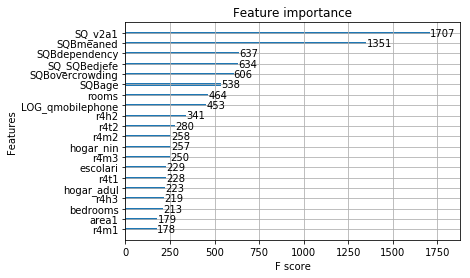

In [321]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Comparison of Models (Rent vs Rent with Transposed)

In [322]:
print("Change in f1 with predicted rent values and transposed features:\n")

# Linear Regression
print("Linear Regression:\t ", round(f1_linear_trans - f1_linear_rent, 5))

# Multiple Logistic Regression
print("Logistic Regression:\t", round(f1_logistic_trans - f1_logistic_rent, 5))

# SVM
print("Support Vector Machines:", round(f1_SVM_trans - f1_SVM_rent, 5))

# Random Forrest
print("Random Forrest:\t\t ", round(f1_RF_trans - f1_RF_rent, 5))

# XGB
print("XGBoost:\t\t", round(f1_xgb_trans - f1_xgb_rent, 5))

Change in f1 with predicted rent values and transposed features:

Linear Regression:	  0.00543
Logistic Regression:	 -0.1368
Support Vector Machines: -0.00368
Random Forrest:		  0.01953
XGBoost:		 0.00114


### Random Forest vs XGBoost

In [323]:
print("RENT (RF)\t", f1_RF_rent)
print("RENT / TRANSFORMED (RF)", f1_RF_trans)
print("RENT (XGB)\t", f1_xgb_rent)
print("RENT / TRANSFORMED (XGB)", f1_xgb_trans)

RENT (RF)	 0.8491196917363437
RENT / TRANSFORMED (RF) 0.8686515274795253
RENT (XGB)	 0.8003930331587177
RENT / TRANSFORMED (XGB) 0.8015303013923214
